# Paper experiments params


For callibration run uncomment `compensation method 1 sphere` and `compensation method measurement 1 tube`

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/mjirik/miniconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib


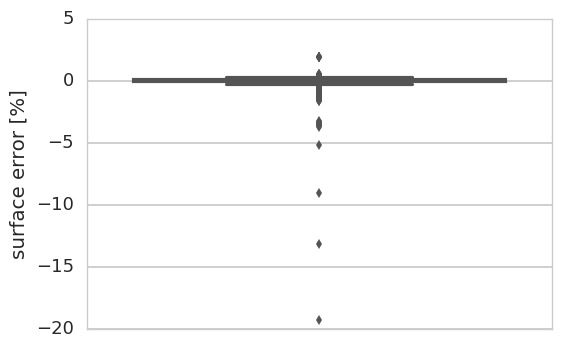

235/1505


In [27]:
%run evaltools.ipynb
# %run experiments_params.ipynb

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns
import sys
pth = op.abspath("../")
print pth
sys.path.insert(0, pth)
import teigen
import itertools
reload(teigen)
print teigen.__path__
import teigen.tb_vtk
reload (teigen.tb_vtk)

/home/mjirik/projects/teigen
['/home/mjirik/projects/teigen/teigen']


<module 'teigen.tb_vtk' from '/home/mjirik/projects/teigen/teigen/tb_vtk.pyc'>

In [29]:
# run_list = [
#     "mix 2", # test quality of compensation
#     "mix 3", # test quality of compensation
    # "short",
    #"element number", # run in the morning
    # "compensation method 5 tubes", # looks good
    #
    # == paper experiments
#     "generated volume resolution_mm", # done
#     "generated volume isotropy", # one half
#     "generated volume radius", # ok
#     "generated volume length",  # do pulky
#     "generated volume element_number anisotropic", # asi ok
#     "generated volume noise", 
# ]

In [30]:
tg = teigen.tgmain.Teigen()
config = tg.get_default_config()

In [31]:
# pp(config)
# config

# Prepare multiple configs


In [32]:
tg = teigen.tgmain.Teigen()
if not "configs" in dir():
    configs = []

In [33]:
## Paper figures
def get_paper_config(resolution_mm=0.02):
    config = tg.get_default_config()
    config["generator_id"] = 3
    #config["output"]["note"] = run_label + " " + radius_method
    gc = config["generators"]["Unconnected tubes"]
    gc["element_number"] = 30
    gc["radius_distribution_uniform"] = True
    gc["radius_distribution_fixed"] = False
    gc["orientation_anisotropic"] = False
    gc["radius_distribution_mean"] = 0.2
    gc["radius_distribution_standard_deviation"] = 0.1
    gc["radius_distribution_maximum"] = 3.0
    gc["radius_distribution_minimum"] = .02
    gc['radius_distribution_uniform'] = False
    gc['radius_distribution_normal'] = True
    gc["length_distribution_mean"] = 3.0
    gc["length_distribution_standard_deviation"] = .1
    gc["volume_fraction"] = 0.5
    gc["random_generator_seed"] = 100
    gc["orientation_anisotropic"] = False
    config["postprocessing"]["gaussian_blur"] = True
    config["postprocessing"]["gaussian_filter_sigma_mm"] = 0.04
    config["postprocessing"]["measurement_resolution"] = 35
    config["postprocessing"]['add_noise'] = False
    config["appearance"]["skip_volume_generation"] = False
    # config["appearance"]["skip_volume_generation"] = True
    config["measurement"]["polygon_radius_selection_method"] = "inscribed"
    config['areasampling']["areasize_mm"] = [10.0, 10.0, 10.0]
    config['areasampling']["areasize_px"] = [10.0/resolution_mm, 10.0/resolution_mm, 10.0/resolution_mm]
    config['areasampling']["voxelsize_mm"] = [resolution_mm, resolution_mm, resolution_mm]
    # config['filepattern'] = "~/teigen_data/generated_resolution_mm_{seriesn:03d}/data{:06d}.jpg"
    return config

In [34]:
run_label = "mix"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    # 26, 31, 33, 39, 
    # 41, 45, 59, 
    # 47, 
    45, 53, 57]
element_numbers = [10, 15]
radiuses = [15., 20.]
rnds = [#110,
        112]
lengths = [28, 30, 32]
radius_methods = [
            #"cylinder surface + sphere error",
            "cylinder volume + sphere error",
            # "cylinder volume + sphere error + man", # fine
            # "cylinder surface + sphere error + join error", # fine
            # "cylinder surface + sphere error + join error man" # fine

]
for resolution, radius, rnd, radius_method, length, element_number in itertools.product(
    resolutions, radiuses, rnds, radius_methods, lengths, element_numbers):
            config = tg.get_default_config()
            config["generator_id"] = 3
            config["output"]["note"] = run_label + " " + radius_method
            gc = config["generators"]["Unconnected tubes"]
            gc["element_number"] = element_number
            gc["radius_distribution_uniform"] = True
            gc["radius_distribution_fixed"] = False
            gc["orientation_anisotropic"] = False
            gc["radius_distribution_mean"] = radius
            gc["radius_distribution_standard_deviation"] = 0.1
            gc["radius_distribution_maximum"] = 30.0
            gc["radius_distribution_minimum"] = 3.0
            gc["length_distribution_mean"] = length
            gc["length_distribution_standard_deviation"] = 10.0
            gc["random_generator_seed"] = rnd
            config["postprocessing"]["measurement_resolution"] = resolution
            config["appearance"]["skip_volume_generation"] = True
            config["measurement"]["polygon_radius_selection_method"] = radius_method
            config["output"][run_label_key] = run_label 
#             configs[run_label] = config
            configs.append(config)

In [35]:
run_label = "mix 2"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    26, 31, 33, 39, 
    41, 45, 59, 
    47,

    45, 
    51, # ok kromě cylinder surface + sphere error
    53, 
    55]
element_numbers = [10]
radiuses = [15., 20.]
rnds = [110,

        112,
        113,
       ]
lengths = [28, 30, 32]
radius_methods = [
#             "inscribed",
            "cylinder surface + sphere error",
            "cylinder volume + sphere error",
            "cylinder surface + sphere error + join error", # fine
            "cylinder volume + sphere error + join error", # fine

]
i = 0
for resolution, radius, rnd, radius_method, length, element_number in itertools.product(
    resolutions, radiuses, rnds, radius_methods, lengths, element_numbers):

            config = tg.get_default_config()
            config["generator_id"] = "Unconnected tubes"
            config["output"]["note"] = run_label + " " + radius_method
            config["areasampling"]["voxelsize_mm"] = [1.0, 1.0, 1.0]
            config["areasampling"]["areasize_mm"] = [100.0, 100.0, 100.0]
            config["areasampling"]["areasize_px"] = [100, 100, 100]
            gc = config["generators"]["Unconnected tubes"]
            gc["element_number"] = element_number
            gc["radius_distribution_uniform"] = True
            gc["radius_distribution_fixed"] = False
            gc["orientation_anisotropic"] = False
            gc["radius_distribution_mean"] = radius
            gc["radius_distribution_standard_deviation"] = 0.1
            gc["radius_distribution_maximum"] = 30.0
            gc["radius_distribution_minimum"] = 3.0
            gc["length_distribution_mean"] = length
            gc["length_distribution_standard_deviation"] = 10.0
            gc["random_generator_seed"] = rnd
            gc['radius_distribution_uniform'] = False
            gc['radius_distribution_normal'] = True
            config["postprocessing"]["measurement_resolution"] = resolution
            config["appearance"]["skip_volume_generation"] = True
            config["measurement"]["polygon_radius_selection_method"] = radius_method
            config['filepattern'] = "~/teigen_data/mix3_{:03d}_".format(i) + "_{seriesn:03d}/data{:06d}.jpg"
            i += 1
            config["output"][run_label_key] = run_label 
            configs.append(config)
#             configs[run_label] = config

In [36]:
run_label = "mix 3"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    35
    ]
element_numbers = [5]
radiuses = [0.5, 1., 1.5]
rnds = [110,

        112,
        113,
       ]
lengths = [3, 4, 5, ]
radius_methods = [
            "inscribed",
            "cylinder surface + sphere error",
            "cylinder volume + sphere error",
            "cylinder surface + sphere error + join error", # fine
            "cylinder volume + sphere error + join error", # fine

]
i = 0
for resolution, radius, rnd, radius_method, length, element_number in itertools.product(
    resolutions, radiuses, rnds, radius_methods, lengths, element_numbers):

            config = get_paper_config()
            config["generator_id"] = "Unconnected tubes"
            config["output"]["note"] = run_label + " " + radius_method
            config["areasampling"]["voxelsize_mm"] = [1.0, 1.0, 1.0]
            config["areasampling"]["areasize_mm"] = [100.0, 100.0, 100.0]
            config["areasampling"]["areasize_px"] = [100, 100, 100]
            gc = config["generators"]["Unconnected tubes"]
            gc["element_number"] = element_number
            gc["radius_distribution_uniform"] = False
            gc["radius_distribution_fixed"] = False
            gc["radius_distribution_normal"] = True
            gc["orientation_anisotropic"] = False
            gc["radius_distribution_mean"] = radius
            gc["radius_distribution_standard_deviation"] = 0.1
            gc["radius_distribution_maximum"] = 5.0
            gc["radius_distribution_minimum"] = .1
            gc["length_distribution_mean"] = length
            gc["length_distribution_standard_deviation"] = .1
            gc["random_generator_seed"] = rnd
            gc['radius_distribution_uniform'] = False
            gc['radius_distribution_normal'] = True
            config["postprocessing"]["measurement_resolution"] = resolution
            config["appearance"]["skip_volume_generation"] = True
            config["measurement"]["polygon_radius_selection_method"] = radius_method
            config['filepattern'] = "~/teigen_data/mix4_{:03d}_".format(i) + "_{seriesn:03d}/data{:06d}.jpg"
            i += 1
            config["output"][run_label_key] = run_label 
            configs.append(config)
#             configs[run_label] = config

In [36]:
run_label = "mix 4"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    35
    ]
element_numbers = [3]
radiuses = [0.5, 1., 1.5]
rnds = [110,

        112,
        113,
       ]
lengths = [1., 3., 6., ]
radius_methods = [
            "inscribed",
            "cylinder volume", 
            "cylinder surface", 
            "cylinder surface + sphere error",
            "cylinder volume + sphere error",
            "cylinder surface + sphere error + join error", # fine
            "cylinder volume + sphere error + join error", # fine

]
i = 0
for resolution, radius, rnd, radius_method, length, element_number in itertools.product(
    resolutions, radiuses, rnds, radius_methods, lengths, element_numbers):

            config = get_paper_config()
            config["generator_id"] = "Unconnected tubes"
            config["output"]["note"] = run_label + " " + radius_method
            config["areasampling"]["voxelsize_mm"] = [1.0, 1.0, 1.0]
            config["areasampling"]["areasize_mm"] = [100.0, 100.0, 100.0]
            config["areasampling"]["areasize_px"] = [100, 100, 100]
            gc = config["generators"]["Unconnected tubes"]
            gc["element_number"] = element_number
            gc["radius_distribution_uniform"] = False
            gc["radius_distribution_fixed"] = False
            gc["radius_distribution_normal"] = True
            gc["orientation_anisotropic"] = False
            gc["radius_distribution_mean"] = radius
            gc["radius_distribution_standard_deviation"] = 0.1
            gc["radius_distribution_maximum"] = 5.0
            gc["radius_distribution_minimum"] = .1
            gc["length_distribution_mean"] = length
            gc["length_distribution_standard_deviation"] = .1
            gc["random_generator_seed"] = rnd
            gc['radius_distribution_uniform'] = False
            gc['radius_distribution_normal'] = True
            config["postprocessing"]["measurement_resolution"] = resolution
            config["appearance"]["skip_volume_generation"] = True
            config["measurement"]["polygon_radius_selection_method"] = radius_method
            config['filepattern'] = "~/teigen_data/mix4_{:03d}_".format(i) + "_{seriesn:03d}/data{:06d}.jpg"
            i += 1
            config["output"][run_label_key] = run_label 
            configs.append(config)
#             configs[run_label] = config

# paper data

In [37]:
# bez šumu
run_label = "generated volume resolution_mm"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    # 26, 31, 33, 39, 
    # 41, 45, 59, 
    # 47,
    # 15,
    # 25,
    35,
    # 45,
    # 55,
    # 65,

    # 51, ok kromě cylinder surface + sphere error
    #53, 
    #55
]
resolutions_mm = [.5, .4, .3, .2, 0.1, 0.08, 0.06, 0.04, 0.02, .01]
element_numbers = [30]
radiuses = [.2]
rnds = [
    110,
   # 111,
   # 112
]
lengths = [3.0]
radius_methods = [
            "inscribed",
            # "cylinder surface + sphere error",
            # "cylinder volume + sphere error",
            # "cylinder surface + sphere error + join error",
            # "cylinder volume + sphere error + join error", 

]
for resolution_mm, radius_method  in itertools.product(
    resolutions_mm, radius_methods):
            config = get_paper_config(resolution_mm=resolution_mm)
            gc = config["generators"]["Unconnected tubes"]
            config["output"]["note"] = run_label + " " + radius_method
            config['filepattern'] = "~/teigen_data/teigen_resolution_mm_" + str(resolution_mm) + "_{seriesn:03d}/data{:06d}.jpg"
            config["output"][run_label_key] = run_label 
#             configs[run_label] = config
            configs.append(config)

In [38]:
# bez šumu
run_label = "generated volume isotropy"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    # 26, 31, 33, 39, 
    # 41, 45, 59, 
    # 47,
    # 15,
    # 25,
    35,
    # 45,
    # 55,
    # 65,

    # 51, ok kromě cylinder surface + sphere error
    #53, 
    #55
]
resolutions_mm = [
    .5, .4, .3, .2, 0.1, 0.08, 0.06, 
    0.04, 0.02, .01]
                   #0.4, 0.2, .1
isotropy_values = [
    5, 4, 3, 2, 1, 0.8, 0.6, 0.3, 0.2, .1
]
element_numbers = [30]
radiuses = [.2]
rnds = [
    110,
   # 111,
   # 112
]
lengths = [3.0]
radius_methods = [
            "inscribed",
            # "cylinder surface + sphere error",
            # "cylinder volume + sphere error",
            # "cylinder surface + sphere error + join error",
            # "cylinder volume + sphere error + join error", 

]
for isotropy, radius_method in itertools.product(
    isotropy_values, radius_methods):
            config = get_paper_config()
            gc = config["generators"]["Unconnected tubes"]
            config["output"]["note"] = run_label + " " + radius_method
            gc["orientation_anisotropic"] = True
            gc["orientation_variance_rad"] = isotropy
            config['filepattern'] = "~/teigen_data/teigen_isotropy_" + str(isotropy) + "_{seriesn:03d}/data{:06d}.jpg"
            config["output"][run_label_key] = run_label 
#             configs[run_label] = config
            configs.append(config)

In [39]:
run_label = "generated volume element_number"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    # 26, 31, 33, 39, 
    # 41, 45, 59, 
    # 47,
    # 15,
    # 25,
    35,
    # 45,
    # 55,
    # 65,

    # 51, ok kromě cylinder surface + sphere error
    #53, 
    #55
]
resolutions_mm = [.2]
element_numbers = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
radiuses = [.5]
rnds = [
    110,
   # 111,
   # 112
]
lengths = [3.0]
radius_methods = [
            "inscribed",
            # "cylinder surface + sphere error",
            # "cylinder volume + sphere error",
            # "cylinder surface + sphere error + join error",
            # "cylinder volume + sphere error + join error", 

]
for element_number, radius_method in itertools.product(
    element_numbers, radius_methods):
            config = get_paper_config()
            gc = config["generators"]["Unconnected tubes"]
            config["output"]["note"] = run_label + " " + radius_method
            gc["element_number"] = element_number
            config['filepattern'] = "~/teigen_data/teigen_element_number_" + str(element_number) + "_{seriesn:03d}/data{:06d}.jpg"
            config["output"][run_label_key] = run_label 
#             configs[run_label] = config
            configs.append(config)

In [40]:
run_label = "generated volume element_number anisotropic"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    # 26, 31, 33, 39, 
    # 41, 45, 59, 
    # 47,
    # 15,
    # 25,
    35,
    # 45,
    # 55,
    # 65,

    # 51, ok kromě cylinder surface + sphere error
    #53, 
    #55
]
resolutions_mm = [.2]
element_numbers = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
radiuses = [.5]
rnds = [
    110,
   # 111,
   # 112
]
lengths = [3.0]
radius_methods = [
            "inscribed",
            # "cylinder surface + sphere error",
            # "cylinder volume + sphere error",
            # "cylinder surface + sphere error + join error",
            # "cylinder volume + sphere error + join error", 

]
for element_number, radius_method in itertools.product(
    element_numbers, radius_methods):
            config = get_paper_config()
            gc = config["generators"]["Unconnected tubes"]
            config["output"]["note"] = run_label + " " + radius_method
            gc["element_number"] = element_number
            gc["orientation_anisotropic"] = True
            gc["maximum_1000_iteration_number"] = 30
            config['filepattern'] = "~/teigen_data/teigen_element_number_anisotropic_" + str(element_number) + "_{seriesn:03d}/data{:06d}.jpg"
            config["output"][run_label_key] = run_label 
#             configs[run_label] = config
            configs.append(config)

In [41]:
run_label = "generated volume radius"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    # 26, 31, 33, 39, 
    # 41, 45, 59, 
    # 47,
    # 15,
    # 25,
    35,
    # 45,
    # 55,
    # 65,

    # 51, ok kromě cylinder surface + sphere error
    #53, 
    #55
]
resolutions_mm = [.02]

element_numbers = [30]
radiuses = [0.06, 0.08, 0.1, 0.2, .3, .5, .8, 1.0, 1.5, 3.0]
rnds = [
    110,
   # 111,
   # 112
]
lengths = [3.0]
radius_methods = [
            "inscribed",
            # "cylinder surface + sphere error",
            # "cylinder volume + sphere error",
            # "cylinder surface + sphere error + join error",
            # "cylinder volume + sphere error + join error", 

]
for radius, radius_method in itertools.product(
    radiuses, radius_methods):
            config = get_paper_config()
            gc = config["generators"]["Unconnected tubes"]
            config["output"]["note"] = run_label + " " + radius_method
            gc["radius_distribution_mean"] = radius
            gc["radius_distribution_uniform"] = False
            gc["radius_distribution_fixed"] = True
            gc["radius_distribution_normal"] = False
            config['filepattern'] = "~/teigen_data/teigen_radius_" + str(radius) + "_{seriesn:03d}/data{:06d}.jpg"
            config["output"][run_label_key] = run_label 
#             configs[run_label] = config
            configs.append(config)

In [42]:
run_label = "generated volume length"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    # 26, 31, 33, 39, 
    # 41, 45, 59, 
    # 47,
    # 15,
    # 25,
    35,
    # 45,
    # 55,
    # 65,

    # 51, ok kromě cylinder surface + sphere error
    #53, 
    #55
]
resolutions_mm = [.02]
element_numbers = [30]
radiuses = [0.2]
rnds = [
    110,
   # 111,
   # 112
]
lengths = [
    0.05, 0.1, 0.2, 
    0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 
    #5.0, 6.0
]
radius_methods = [
            "inscribed",
            # "cylinder surface + sphere error",
            # "cylinder volume + sphere error",
            # "cylinder surface + sphere error + join error",
            # "cylinder volume + sphere error + join error", 

]
for radius_method, length in itertools.product(
    radius_methods, lengths):
            config = get_paper_config()
            gc = config["generators"]["Unconnected tubes"]
            config["output"]["note"] = run_label + " " + radius_method
            # gc["radius_distribution_mean"] = radius
            gc["length_distribution_mean"] = length
            config['filepattern'] = "~/teigen_data/teigen_length_" + str(length) + "_{seriesn:03d}/data{:06d}.jpg"
            config["output"][run_label_key] = run_label 
#             configs[run_label] = config
            configs.append(config)

In [43]:
run_label = "generated volume noise"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    # 26, 31, 33, 39, 
    # 41, 45, 59, 
    # 47,
    # 15,
    # 25,
    35,
    # 45,
    # 55,
    # 65,

    # 51, ok kromě cylinder surface + sphere error
    #53, 
    #55
]
resolutions_mm = [.02]
element_numbers = [30]
radiuses = [.3, .5, .8, 1.1, 1.5]
rnds = [
    #110,
    111,
    # 112
]
noises = [20, 40, 60, 80, 100, 120, 140, 160, 200, 220]
lengths = [3.0]
radius_methods = [
            "inscribed",
            # "cylinder surface + sphere error",
            # "cylinder volume + sphere error",
            # "cylinder surface + sphere error + join error",
            # "cylinder volume + sphere error + join error", 

]
for noise, radius_method in itertools.product( noises, radius_methods):
            config = get_paper_config()
            gc = config["generators"]["Unconnected tubes"]
            config["output"]["note"] = run_label + " " + radius_method
            config['filepattern'] = "~/teigen_data/teigen_noise_" + str(noise) + "_{seriesn:03d}/data{:06d}.jpg"
            config["postprocessing"]['add_noise'] = True
            config["postprocessing"]['noise_exponent'] = 0.
            config["postprocessing"]['noise_std'] = noise
            config["postprocessing"]['noise_mean'] = 0.
            config["postprocessing"]['noise_lambda0'] = 0.02
            config["postprocessing"]['noise_lambda1'] = 1.00
            config["output"][run_label_key] = run_label 
#             configs[run_label] = config
            configs.append(config)

In [44]:
run_label = "compensation method 5 tubes"
# if run_label in run_list:
resolutions = [
    # 26, 31, 33, 39, 
    41, 45, 59]
radiuses = [20., 30.]
rnds = [110]
lengths = [10, 30, 50]
radius_methods = [
            # "inscribed", 
            #"circumscribed", 
            #"cylinder surface", 
            #"cylinder volume", 
            #"average", 
            "cylinder volume + sphere error",
            "cylinder surface + sphere error",
            "cylinder surface + sphere error + join error"

]
for resolution, radius, rnd, radius_method, length in itertools.product(
    resolutions, radiuses, rnds, radius_methods, lengths):
            config = tg.get_default_config()
            config["generator_id"] = 3
            config["output"]["note"] = run_label + " " + radius_method
            gc = config["generators"]["Unconnected tubes"]
            gc["element_number"] = 5
            gc["radius_distribution_uniform"] = True
            gc["radius_distribution_fixed"] = False
            gc["orientation_anisotropic"] = False
            gc["radius_distribution_mean"] = radius
            gc["radius_distribution_standard_deviation"] = 2.0
            gc["radius_distribution_maximum"] = 40.0
            gc["radius_distribution_minimum"] = 3.0
            gc["length_distribution_mean"] = length
            gc["length_distribution_standard_deviation"] = 2.0
            gc["random_generator_seed"] = rnd
            config["postprocessing"]["measurement_resolution"] = resolution
            config["appearance"]["skip_volume_generation"] = True
            config["measurement"]["polygon_radius_selection_method"] = radius_method
            config["output"][run_label_key] = run_label 
#             configs[run_label] = config
            configs.append(config)

In [45]:

# bez šumu
run_label = "volume fraction overlap"
radius_method = "inscribed"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    35,
]
resolutions_mm = [.5, .4, .3, .2, 0.1, 0.08, 0.06, 0.04, 0.02, .01]
element_numbers = [30]
radiuses = [.2]
rnds = [
    110,
   # 111,
   # 112
]
lengths = [3.0]
radius_methods = [
            "inscribed",
            # "cylinder surface + sphere error",
            # "cylinder volume + sphere error",
            # "cylinder surface + sphere error + join error",
            # "cylinder volume + sphere error + join error", 

]
# for resolution, radius_method  in itertools.product(
#     resolutions, radius_methods):
config = get_paper_config()
gc = config["generators"]["Unconnected tubes"]
gc["element_number"] = 1000
gc["radius_distribution_maximum"] = 4.0
gc["radius_distribution_minimum"] = .5
gc["orientation_anisotropic"] = True
gc["allow_overlap"] = True
gc["volume_fraction"] = 0.9
config["output"]["note"] = run_label + " " + radius_method
config['filepattern'] = "~/teigen_data/teigen_volume_fraction_overlap2_" + "_{seriesn:03d}/data{:06d}.jpg"
config["output"][run_label_key] = run_label 

# temp for debugg
config["postprocessing"]["measurement_resolution"] = 35
config["appearance"]["skip_volume_generation"] = False
#             configs[run_label] = config
configs.append(config)

In [46]:

# bez šumu
run_label = "porosity"
radius_method = "inscribed"
# if run_label in run_list:
# if run_label in run_list:
# for resolution in [25, 30, 35]:
#    for rnd in [106, 107, 108, 109, 110]:
#        for radius_method in ["best"]:
resolutions = [
    35,
]
resolutions_mm = [.5, .4, .3, .2, 0.1, 0.08, 0.06, 0.04, 0.02, .01]
element_numbers = [30]
radiuses = [.2]
rnds = [
    110,
   # 111,
   # 112
]
lengths = [3.0]
radius_methods = [
            "inscribed",
            # "cylinder surface + sphere error",
            # "cylinder volume + sphere error",
            # "cylinder surface + sphere error + join error",
            # "cylinder volume + sphere error + join error", 

]
# for resolution, radius_method  in itertools.product(
#     resolutions, radius_methods):
config = get_paper_config()
gc = config["generators"]["Unconnected tubes"]
gc["element_number"] = 30
gc["orientation_anisotropic"] = True
config["postprocessing"]["negative"] = True
config["output"]["note"] = run_label + " " + radius_method
config['filepattern'] = "~/teigen_data/teigen_porosity" + "_{seriesn:03d}/data{:06d}.jpg"
config["output"][run_label_key] = run_label 
#             configs[run_label] = config
configs.append(config)

In [47]:
# configs_list = select_configs(configs, run_list)
# run_configs(configs_list)

In [48]:
configs[0]
# run_list

# configs_list

OrderedDict([('generators',
              OrderedDict([('Voronoi tubes',
                            OrderedDict([('element_number', 30),
                                         ('radius_distribution_uniform', True),
                                         ('radius_distribution_normal', False),
                                         ('radius_distribution_fixed', False),
                                         ('radius_distribution_minimum', 2.0),
                                         ('radius_distribution_maximum', 10.0),
                                         ('radius_distribution_mean', 5.0),
                                         ('radius_distribution_standard_deviation',
                                          5.0),
                                         ('random_generator_seed', 0)])),
                           ('Gensei', OrderedDict([('n_objects', 10)])),
                           ('Continuous tubes',
                            OrderedDict([('element_number', 3

In [49]:

# print len(configs)